# Task f
Backwards Time devolepment (1 and 5 steps back)

Using 3 different solvers for linear equations.

Compare efficency and accuracy

In [1]:
from tools import simulate, inital_state_task_f, generate_matrix_simple
import matplotlib.pyplot as plt

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [2]:
# Parameter
nodes = 21
connections = [-2,-1,1,2]
steps = [1,5]

In [3]:
# generate matrix
t_matrix = generate_matrix_simple(nodes,connections)
# generate inital state
inital_state = inital_state_task_f(nodes)

In [4]:
# Now we need to find 3 different solvers
from  scipy.sparse.linalg import spsolve
from numpy.linalg import solve
from scipy.sparse.linalg import bicgstab
import numpy as np
from time import time

# all of them we used at some time during the lectures/github or I found them on the internet.

# We all the funciton with their standard implementation and starting at numpy arrays, to compare them correctly

t_matrix_5 = np.linalg.matrix_power(t_matrix,5)

In [5]:

%timeit x_spsolve = spsolve(t_matrix,inital_state)
x_spsolve = spsolve(t_matrix,inital_state)

%timeit x_spsolve_5 = spsolve(t_matrix_5,inital_state)
x_spsolve_5 = spsolve(t_matrix_5,inital_state)


<magic-timeit>:1: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format


529 µs ± 79.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


/tmp/ipykernel_23373/1392384083.py:2: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x_spsolve = spsolve(t_matrix,inital_state)


480 µs ± 69.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


/tmp/ipykernel_23373/1392384083.py:5: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x_spsolve_5 = spsolve(t_matrix_5,inital_state)


In [6]:

%timeit x_solve = solve(t_matrix,inital_state)
x_solve = solve(t_matrix,inital_state)


x_solve_5 = solve(t_matrix_5,inital_state)
%timeit x_solve_5 = solve(t_matrix_5,inital_state)


The slowest run took 5.83 times longer than the fastest. This could mean that an intermediate result is being cached.
181 µs ± 155 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
215 µs ± 63.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:

x_bicgstab, conv =  bicgstab(t_matrix,inital_state)
print(conv)
%timeit x_bicgstab, _ =  bicgstab(t_matrix,inital_state)

x_bicgstab_5, conv =  bicgstab(t_matrix_5,inital_state)
print(conv)
%timeit x_bicgstab_5, _ =  bicgstab(t_matrix_5,inital_state)

0
1.12 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
0
9.12 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
# times are taken from time it

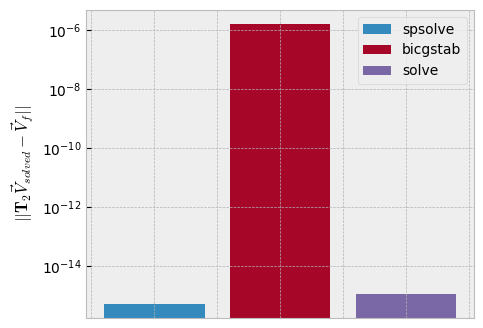

In [9]:
# one step back in time
v_solve = t_matrix @ x_solve
v_bicgstab = t_matrix @ x_bicgstab
v_spsolve = t_matrix @ x_spsolve

plt.figure(figsize=(5,4))
plt.bar(0,np.linalg.norm(v_spsolve-inital_state),label="spsolve")
plt.bar(1,np.linalg.norm(v_bicgstab-inital_state),label="bicgstab")
plt.bar(2,np.linalg.norm(v_solve-inital_state),label="solve")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("$||\mathbf{T}_2\\vec{x}_{n}-\\vec{V}_{f}||$")
plt.legend()
plt.yscale("log")
plt.savefig("images/lin_solve_err.pdf")

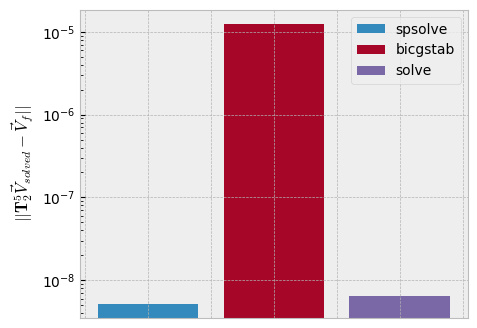

In [10]:
# multiple steps back in time
v_solve = t_matrix_5 @ x_solve_5 
v_bicgstab =  t_matrix_5 @ x_bicgstab_5
v_spsolve = t_matrix_5 @ x_spsolve_5

plt.figure(figsize=(5,4))
plt.bar(0,np.linalg.norm(v_spsolve-inital_state),label="spsolve")
plt.bar(1,np.linalg.norm(v_bicgstab-inital_state),label="bicgstab")
plt.bar(2,np.linalg.norm(v_solve-inital_state),label="solve")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel("$||\\mathbf{T}_2^5\\vec{x}_{n}-\\vec{V}_{f}||$")
plt.legend()
plt.yscale("log")
plt.savefig("images/lin_solve_err_5.pdf")

In [11]:
def plot(vecs,labels,filename=""):
    x = np.array(list(range(21)))
    plt.figure(figsize=(5,4))
    o  = 0.2
    offset =-o
    for vec,label in zip(vecs, labels):
        plt.scatter(x+offset,vec,label=label,alpha=0.9,marker="x")
        offset += o

    plt.xlabel("Node $i$")
    plt.ylabel("$V_i $")
    plt.legend()
    if filename !="":
        plt.savefig(f"images/{filename}.pdf")

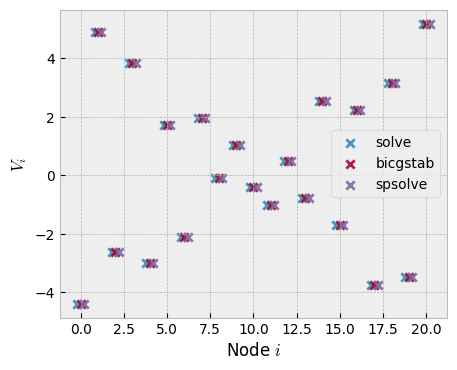

In [12]:
vecs = [x_solve, x_bicgstab, x_spsolve]
labels = ["solve", "bicgstab","spsolve"]
plot(vecs[:],labels[:],filename="ev_back")

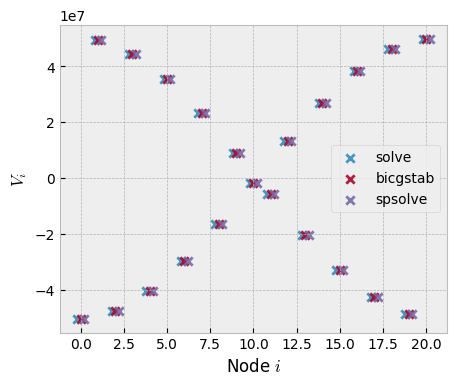

In [13]:
vecs = [x_solve_5, x_bicgstab_5, x_spsolve_5]
labels = ["solve", "bicgstab","spsolve"]
plot(vecs[:],labels[:],filename="ev_back_5")